# Un-subsetted Regions

If you are interested in a region that has not already been pulled out of the whole US dataset, you can still use the tools from the pointprocess toolset to access the data.

In [8]:
import pandas as pd
from pointprocess.region import Region
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# this is where my data path and colormap are set
from lightning_setup import out_path, cmap

%matplotlib inline

To access the data you need a path to the dataset available locally, `out_path`. You also need a center lat, lon, and a radius to go from that lat, lon

In [4]:
c = Region(path=out_path, lat=41.70, lon=-70.35, r=0.5, subsetted=False)

# define a grid. The default is to use a step of 0.01 degrees to get a rough 1km grid
c.define_grid()

This will take about 5 minutes to run for a big month like August

In [6]:
%%time
ds = c.get_ds(m=8)

CPU times: user 3min 34s, sys: 7.42 s, total: 3min 42s
Wall time: 4min 51s


Among other things, this command creates an instance of `Region.FC_grid` which contains the flash counts for each grid quare defined above. To generate a map of these values we smooth the data using a gaussian kernel with sigma=2. Then we divide by the number of years on file. In this case, 25.

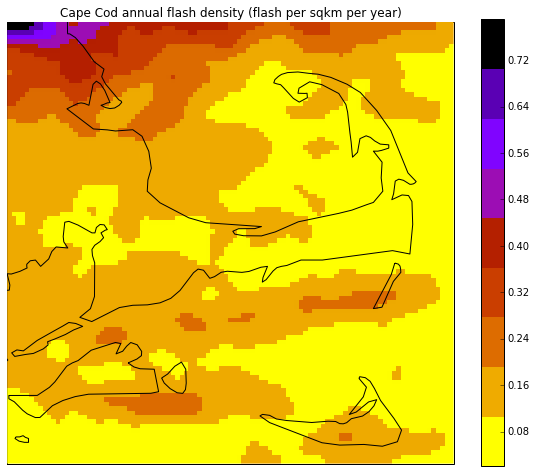

In [9]:
smoothed_flash = gaussian_filter(c.FC_grid, 2)/25

plt.figure(figsize=(10,8))
ax = plt.axes(projection = ccrs.PlateCarree())
im, ax = c.plot_grid(smoothed_flash, cmap=cmap, cbar=True, ax=ax)
ax.coastlines('10m', zorder=10)
plt.title('Cape Cod annual flash density (flash per sqkm per year)');